In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df_index=pd.read_csv('W:/anaconda/18-5-25/temp/krishnaik/data/economic_index.csv')

In [4]:
df_index.head(10)

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195
8,8,2017,4,2.25,5.5,1159
9,9,2017,3,2.25,5.6,1167


In [7]:
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [8]:
df_index

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [9]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [10]:
import seaborn as sns


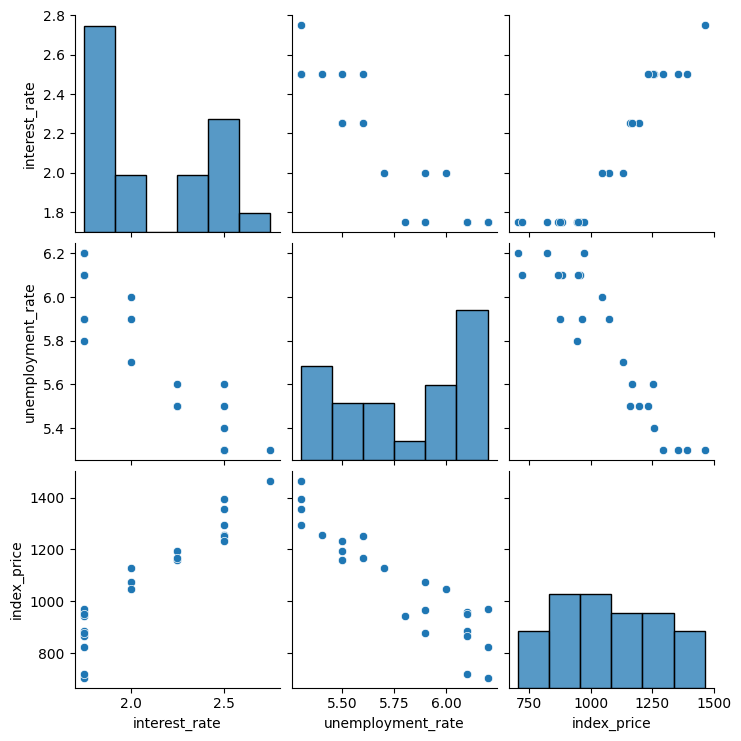

In [15]:
sns.pairplot(df_index)
plt.show()

In [16]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


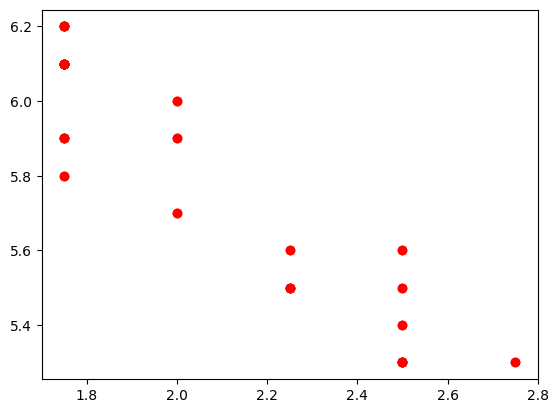

In [18]:
##Visualize the data points more closely

plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.show()

In [19]:
##independent and dependent


X=df_index[['interest_rate','unemployment_rate']]
Y=df_index['index_price']

In [20]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [22]:
##tran test split
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [23]:
import seaborn as sns


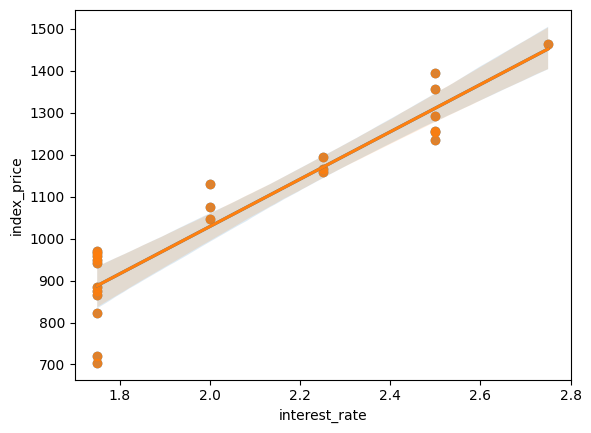

In [29]:
# sns.regplot(df_index['interest_rate'],df_index['index_price'])
## above code doesnt work with new seaborn 
sns.regplot(data=df_index, x='interest_rate', y='index_price')
plt.show()

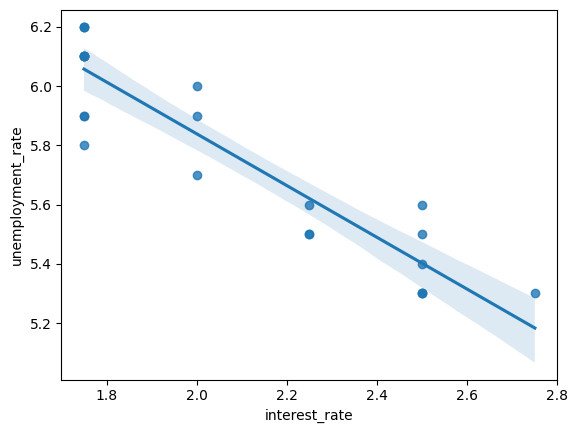

In [30]:
sns.regplot(data=df_index, x='interest_rate', y='unemployment_rate')
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler



In [32]:
scaler=StandardScaler()

In [33]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [34]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [36]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [37]:
regression.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(
    regression,
    X_train,
    Y_train,
    scoring='neg_mean_squared_error',
    cv=3,
    
    )

In [40]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [41]:
y_pred=regression.predict(X_test)

In [42]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [44]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred)
print(score)

0.7591371539010257


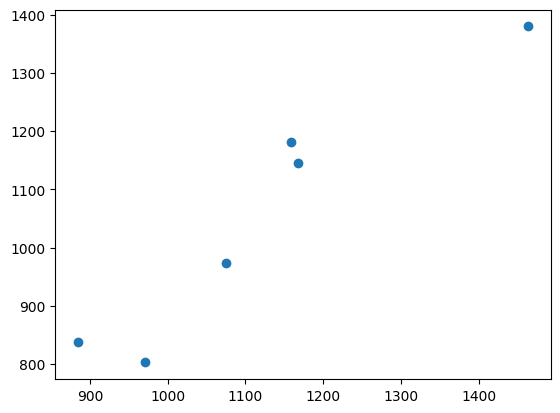

In [45]:
plt.scatter(Y_test,y_pred)
plt.show()

In [46]:
residuals=Y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


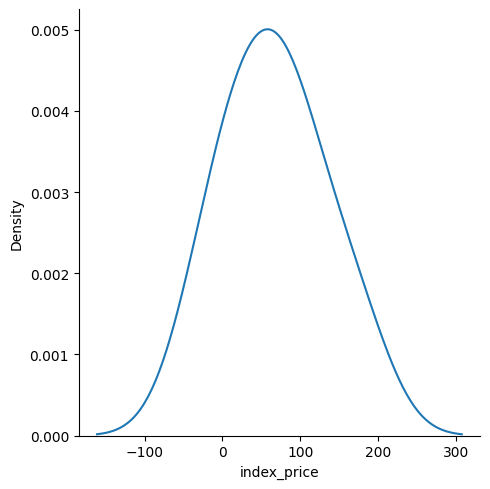

In [50]:
sns.displot(residuals,kind='kde')
plt.show()

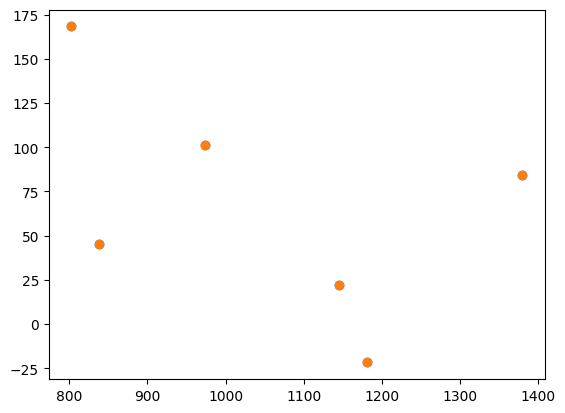

In [52]:
plt.scatter(y_pred,residuals)
plt.show()